# CAR PRICE PREDICTION

## Necessary Imports

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Data Import

In [127]:
df = pd.read_csv("/content/CarPrice_Assignment.csv")

In [128]:
# Overview of Data

df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [129]:
df.shape

(205, 26)

In [130]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [132]:
df.drop(["car_ID"], inplace=True, axis=1)

## Checking for null and duplicate values

In [133]:
# Null
df.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [134]:
# Duplicate
df.duplicated().sum()

0

There are no null nor duplicates in the data.

## EDA

### Statistcs of Numerical Features

In [135]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Difference in the Mean and Median shows the possibilities of potential outliers in the car prices.

### Distribution of features and label

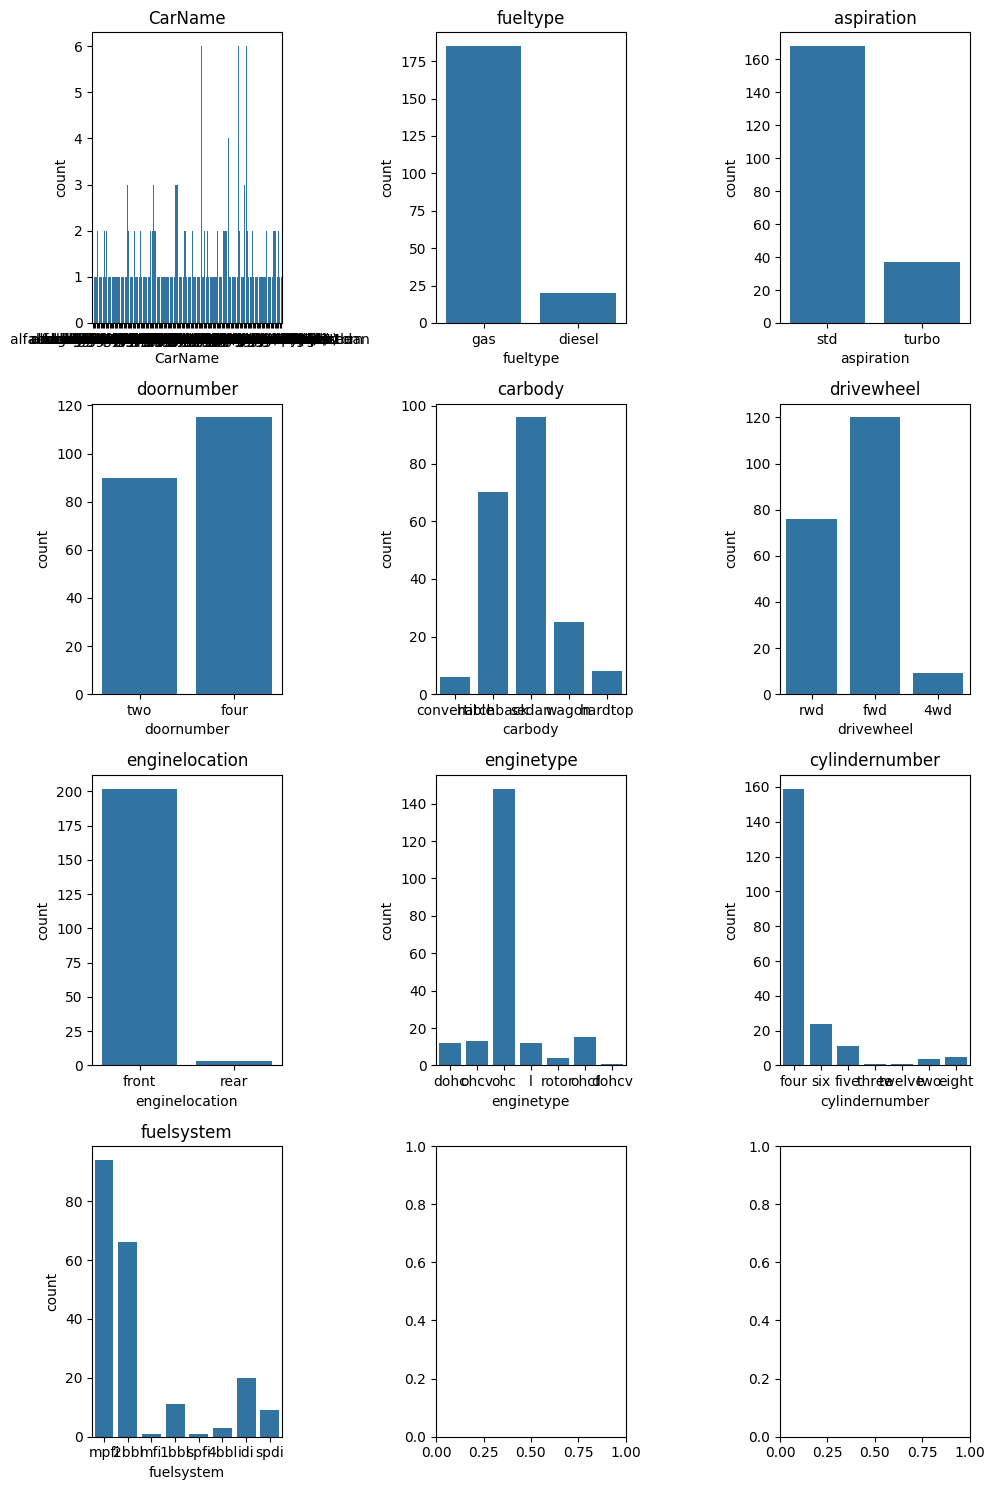

In [136]:
fig, ax = plt.subplots(4, 3, figsize = (10, 15))
ax = ax.flatten()

count = 0
for i in df.select_dtypes("object").columns:
  sns.countplot( x = i, data=df, ax=ax[count]).set_title(i)
  count += 1

fig.tight_layout()
plt.show()

There is high Cardinality in CarName Feature that's why we will drop it.

Most cars has front engine location

In [137]:
df.drop(["CarName"], inplace=True, axis=1)

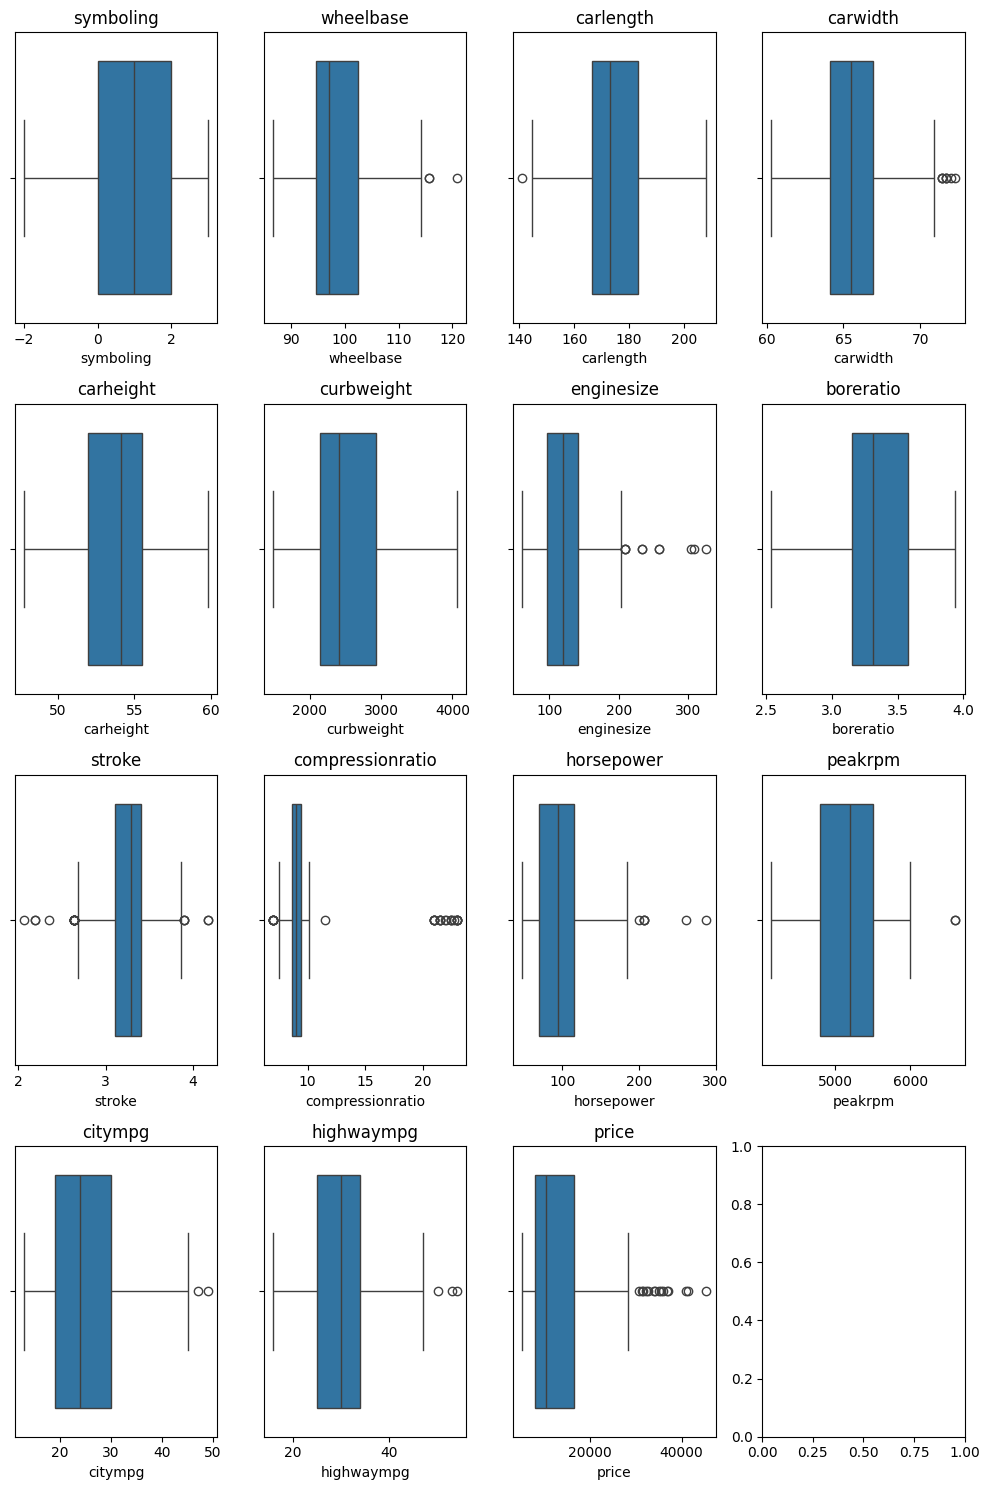

In [138]:
fig, ax = plt.subplots(4, 4, figsize = (10, 15))
ax = ax.flatten()

count = 0
for i in df.select_dtypes("number").columns:
  sns.boxplot( x = i, data=df, ax=ax[count]).set_title(i)
  count += 1

fig.tight_layout()
plt.show()

In [139]:
for i in df.select_dtypes("number").columns:
  q3 = df[i].quantile(0.75)
  q1 = df[i].quantile(0.25)
  IQR = q3 - q1

  upper_limit = q3 + 1.5 * IQR
  lower_limit = q1 - 1.5 * IQR

  df = df[(df[i] >= lower_limit) & (df[i] <= upper_limit)]

We removed all potential outliers

## Correlation of Numeric columns with label

<Axes: >

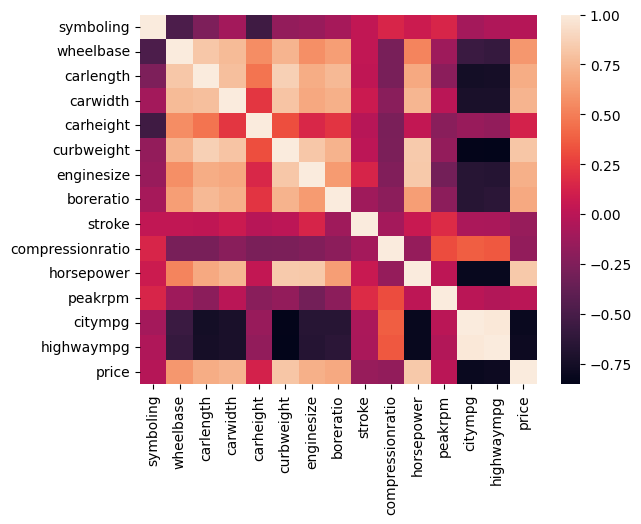

In [140]:
sns.heatmap(df.corr())

## Convertion of Categories to OHE

Now we'll convert Categorical Columns into numerical features using One Hot Encoding method

In [141]:
df = pd.get_dummies(df, columns = df.select_dtypes("object").columns)

In [142]:
df.drop(df.select_dtypes("object").columns, inplace=True)

## Separation of Feature and Label

In [143]:
X = df.drop("price", axis=1)
y = df["price"]

## Preprocessing

In [144]:
#Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

### Scaling

In [145]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Power Transformation

In [146]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_train = pt.fit_transform(X_train + 0.0000001)
X_test = pt.transform(X_test + 0.00000001)

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

lr = LinearRegression()
rf = RandomForestRegressor()

lr.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [148]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred = lr.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

2126.090084984505

In [149]:
y_pred = rf.predict(X_test)

np.sqrt(mean_squared_error(y_test, y_pred))

1749.3392728430779

In [150]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmse_scorer = make_scorer(rmse, greater_is_better=False)

print("Random Forest Cross-validation RMSE Score:", -cross_val_score(rf, X, y, cv=4, scoring=rmse_scorer).mean())

print("Linear Regression Cross-validation RMSE Score:", -cross_val_score(lr, X, y, cv=4, scoring=rmse_scorer).mean())

Random Forest Cross-validation RMSE Score: 2320.2280060418625
Linear Regression Cross-validation RMSE Score: 4400.723067140183


Based on the provided cross-validation RMSE scores:

- Random Forest: Cross-validation RMSE Score of approximately 2320.22.
- Linear Regression: Cross-validation RMSE Score of approximately 4400.72.

The lower the RMSE score, the better the model's predictive performance. In this case, the Random Forest model has a significantly lower cross-validation RMSE score compared to the Linear Regression model. This suggests that the Random Forest model performs better at predicting car prices based on the given features.

Therefore, based on the provided evaluation metrics, the Random Forest model appears to be a better choice for car price prediction compared to Linear Regression. However, it's essential to consider other factors such as model complexity, interpretability, and computational efficiency before making a final decision.